In [22]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# missingno is a  python package especially for visualizing and exploring the missing data of a dataset.
import missingno as msno

# display plots on the notebook itself
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
dataset= pd.read_csv("/content/finaltrain.csv")[0:1800]
dataset.drop(columns=['Telephone'], inplace=True)

In [24]:
dataset.head()


,Sexe,age,Emploi,statut_personnel,mois_pret_duree,historique de credit,but,Prix ( TND),personnes a charge,solde_d'epargne,duree_emploi,taux de versement ( par mois ),autres_debiteurs,Historique residence,propriete,logement,credits_existants,Score
0,Homme,67,employe qualifie,Celibataire,6,critique,Electronique,2338,1,0,13 ans,4,rien,6 ans,immobilier,propre,2,0
1,Femme,22,employe qualifie,NaN,48,rembourse,Electronique,1190,1,890,2 annees,2,rien,5 mois,immobilier,propre,1,1
2,Homme,45,employe qualifie,Celibataire,42,rembourse,meubles,15764,2,90,5 annees,2,garant,13 ans,l'epargne de la societe de construction,gratuitement,1,0
3,Homme,35,resident non qualifie,Celibataire,36,rembourse,education,18110,2,0,2 annees,2,rien,8 annees,inconnu/aucun,gratuitement,1,0
4,Homme,35,independant de gestion,Celibataire,36,rembourse,voiture (occasion),13896,1,570,2 annees,2,rien,3 mois,autre,louer,1,0


In [25]:
dataset['Score'].value_counts()

Score
0    1275
1     525
Name: count, dtype: int64

In [26]:
(dataset['age']).describe()

count    1800.000000
mean       35.809444
std        11.504927
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

In [27]:
def missing_columns(dataframe):
  # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)

    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)

    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']

    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
missing_columns(dataset)

,Missing Count,Missing Count Ratio,Missing Count %
statut_personnel,534,0.296667,29.7
Historique residence,221,0.122778,12.3
duree_emploi,122,0.067778,6.8


In [28]:
def unique_classes(dataframe):
    """
    Returns a dataframe that contains the categorical values and their numbers.

    dataframe: dataframe that gives the column names and their % of missing values
    """
    output = pd.DataFrame()
    output.index = pd.DataFrame(dataframe.select_dtypes('object').apply(pd.Series.nunique)).index
    output['Number of categorical values'] = dataframe.select_dtypes('object').apply(pd.Series.nunique).values
    output['categorical values'] = dataframe.select_dtypes('object').apply(pd.Series.unique).values
    pd.set_option('display.max_colwidth', None)
    return output

unique_classes(dataset)

,Number of categorical values,categorical values
Sexe,2,"[Homme, Femme]"
Emploi,4,"[employe qualifie, resident non qualifie, independant de gestion, chomeur non resident]"
statut_personnel,3,"[Celibataire, nan, divorce, marie]"
historique de credit,5,"[critique, rembourse, entierement rembourse, entierement rembourse cette banque, retarde]"
but,10,"[Electronique, meubles, education, voiture (occasion), voiture (neuve), Entreprise, reparations, autres, appareils electromenagers, reconversion]"
duree_emploi,31,"[13 ans, 2 annees, 5 annees, 4 annees, nan, 6 mois, 5 mois, 3 annees, 1 ans, 17 ans, 3 mois, 9 annees, 4 mois, 10 mois, 11 ans, 7 mois, 19 annees, 7 ans, 14 ans, 1 mois, 18 ans, 16 ans, 15 ans, 6 ans, 8 annees, 12 ans, 2 mois, 0 mois, 9 mois, 10 annees, 8 mois, 11 mois]"
autres_debiteurs,3,"[rien, garant, codemandeur]"
Historique residence,36,"[6 ans, 5 mois, 13 ans, 8 annees, 3 mois, 24 ans, 10 mois, nan, 10 annees, 19 annees, 0 mois, 7 ans, 3 annees, 7 mois, 1 ans, 16 ans, 6 mois, 2 annees, 20 ans, 11 mois, 8 mois, 14 ans, 21 ans, 5 annees, 9 mois, 2 mois, 15 ans, 11 ans, 18 ans, 22 ans, 23 annees, 4 mois, 12 ans, 4 annees, 1 mois, 17 ans, 9 annees]"
propriete,4,"[immobilier, l'epargne de la societe de construction, inconnu/aucun, autre]"
logement,3,"[propre, gratuitement, louer]"


In [29]:
# ploting boxplot
def transform_year(Dataframe,x):
    y = pd.DataFrame(Dataframe[x]).values.tolist()
    output=[]
    for i in range(Dataframe.shape[0]):
        n = y[i][0]
        if type(n) == float:
            output.append(n)
        else:
            number = [int(temp)for temp in n.split() if temp.isdigit()]
            if("annees" in n) or ("ans" in n):
                output.append(number[0]*12)
            elif ("mois" in n) :
                output.append(number[0])
            else:
                output.append('nan')
    return output
dataset["duree_emploi"] = transform_year(dataset,"duree_emploi")

In [30]:
dataset.loc[(dataset.duree_emploi.isnull()), 'duree_emploi']= 0

In [31]:
missing_columns(dataset)

,Missing Count,Missing Count Ratio,Missing Count %
statut_personnel,534,0.296667,29.7
Historique residence,221,0.122778,12.3


In [32]:
dataset.loc[(dataset.statut_personnel.isnull()), 'statut_personnel']= 'Celibataire'

In [33]:
missing_columns(dataset)

,Missing Count,Missing Count Ratio,Missing Count %
Historique residence,221,0.122778,12.3


In [34]:
dataset["Historique residence"]

0          6 ans
1         5 mois
2         13 ans
3       8 annees
4         3 mois
          ...   
1795      0 mois
1796      14 ans
1797    2 annees
1798    3 annees
1799         NaN
Name: Historique residence, Length: 1800, dtype: object

In [35]:
dataset["Historique residence"] = transform_year(dataset,"Historique residence")
dataset["Historique residence"] = dataset['Historique residence'].fillna(dataset['Historique residence'].median())
print("dataset: \n{}".format(dataset.dtypes.value_counts()))

dataset: 
object     8
int64      8
float64    2
Name: count, dtype: int64


In [36]:
unique_classes(dataset)

,Number of categorical values,categorical values
Sexe,2,"[Homme, Femme]"
Emploi,4,"[employe qualifie, resident non qualifie, independant de gestion, chomeur non resident]"
statut_personnel,3,"[Celibataire, divorce, marie]"
historique de credit,5,"[critique, rembourse, entierement rembourse, entierement rembourse cette banque, retarde]"
but,10,"[Electronique, meubles, education, voiture (occasion), voiture (neuve), Entreprise, reparations, autres, appareils electromenagers, reconversion]"
autres_debiteurs,3,"[rien, garant, codemandeur]"
propriete,4,"[immobilier, l'epargne de la societe de construction, inconnu/aucun, autre]"
logement,3,"[propre, gratuitement, louer]"


In [37]:
dataset.loc[(dataset.Sexe == 'Homme'),'Sexe']= 1
dataset.loc[(dataset.Sexe == 'Femme'),'Sexe']= 0
dataset['Sexe'] = dataset['Sexe'].astype(int)

In [38]:
# Create a label encode object having more than or equal to 5 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in dataset.select_dtypes('object').columns:

    # select only those columns where number of unique values in the category is more than or equal to 5
    if pd.Series.nunique(dataset[col]) >= 5:
        dataset[col] = le.fit_transform(dataset[col].astype(str))
        transform_counter+=1

print("Label encoded {} columns.".format(transform_counter))

Label encoded 2 columns.


In [39]:
unique_classes(dataset)

,Number of categorical values,categorical values
Emploi,4,"[employe qualifie, resident non qualifie, independant de gestion, chomeur non resident]"
statut_personnel,3,"[Celibataire, divorce, marie]"
autres_debiteurs,3,"[rien, garant, codemandeur]"
propriete,4,"[immobilier, l'epargne de la societe de construction, inconnu/aucun, autre]"
logement,3,"[propre, gratuitement, louer]"


In [40]:
dataset = pd.get_dummies(dataset,drop_first=True)
dataset.head()

,Sexe,age,mois_pret_duree,historique de credit,but,Prix ( TND),personnes a charge,solde_d'epargne,duree_emploi,taux de versement ( par mois ),...,Emploi_resident non qualifie,statut_personnel_divorce,statut_personnel_marie,autres_debiteurs_garant,autres_debiteurs_rien,propriete_immobilier,propriete_inconnu/aucun,propriete_l'epargne de la societe de construction,logement_louer,logement_propre
0,1,67,6,0,0,2338,1,0,156.0,4,...,False,False,False,False,True,True,False,False,False,True
1,0,22,48,3,0,1190,1,890,24.0,2,...,False,False,False,False,True,True,False,False,False,True
2,1,45,42,3,5,15764,2,90,60.0,2,...,False,False,False,True,False,False,False,True,False,False
3,1,35,36,3,4,18110,2,0,24.0,2,...,True,False,False,False,True,False,True,False,False,False
4,1,35,36,3,9,13896,1,570,24.0,2,...,False,False,False,False,True,False,False,False,True,False


In [41]:
from sklearn.model_selection import train_test_split
X = dataset.loc[:, dataset.columns != 'Score' ]
y = dataset.Score
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.20, random_state=0)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (10, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

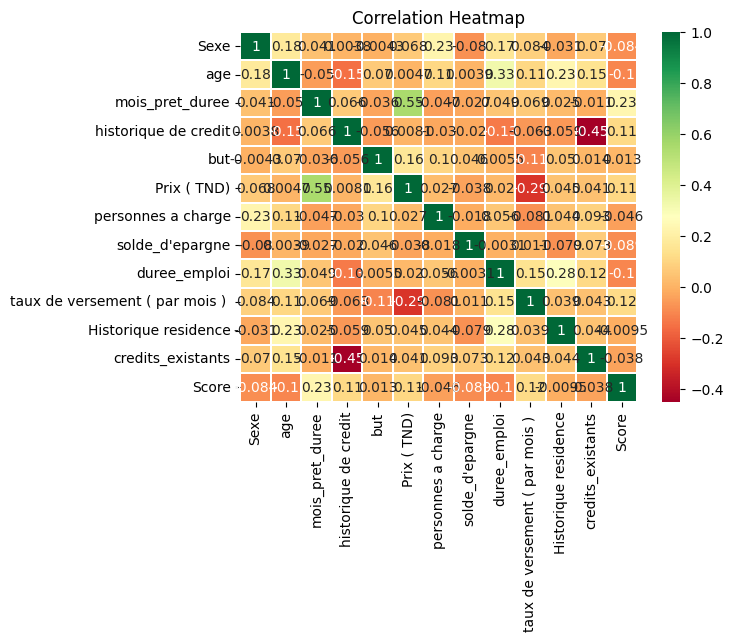

<Figure size 800x500 with 0 Axes>

In [61]:
numeric_data = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.figure(figsize=(8,5))
plt.show()

In [47]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.

    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()

    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))),
            df['Importance'].head(30),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))

    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")

    plt.show()
    return df

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
svc = SVC()

model = svc.fit(X_train,y_train)
y_svcpred = model.predict(X_valid)

print(classification_report(y_valid, y_svcpred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       256
           1       0.00      0.00      0.00       104

    accuracy                           0.71       360
   macro avg       0.36      0.50      0.42       360
weighted avg       0.51      0.71      0.59       360



In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train,y_train)
y_lrpred = model.predict(X_valid)

print(classification_report(y_valid, y_lrpred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       256
           1       0.67      0.17      0.27       104

    accuracy                           0.74       360
   macro avg       0.70      0.57      0.56       360
weighted avg       0.72      0.74      0.68       360



In [49]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

model = dtc.fit(X_train, y_train)
y_dtcpred = model.predict(X_valid)

print(classification_report(y_valid, y_dtcpred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       256
           1       0.96      0.88      0.91       104

    accuracy                           0.95       360
   macro avg       0.95      0.93      0.94       360
weighted avg       0.95      0.95      0.95       360



In [50]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
ada = AdaBoostClassifier()

model_ada = ada.fit(X_train,y_train)
y_pred_ada = model_ada.predict(X_valid)

print(classification_report(y_valid, y_pred_ada))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       256
           1       0.73      0.46      0.56       104

    accuracy                           0.79       360
   macro avg       0.77      0.70      0.72       360
weighted avg       0.79      0.79      0.78       360



In [51]:
rfc = RandomForestClassifier()

model_rf = rfc.fit(X_train,y_train)
y_pred_rfc = model_rf.predict(X_valid)

print(classification_report(y_valid, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       256
           1       0.98      0.86      0.91       104

    accuracy                           0.95       360
   macro avg       0.96      0.92      0.94       360
weighted avg       0.95      0.95      0.95       360



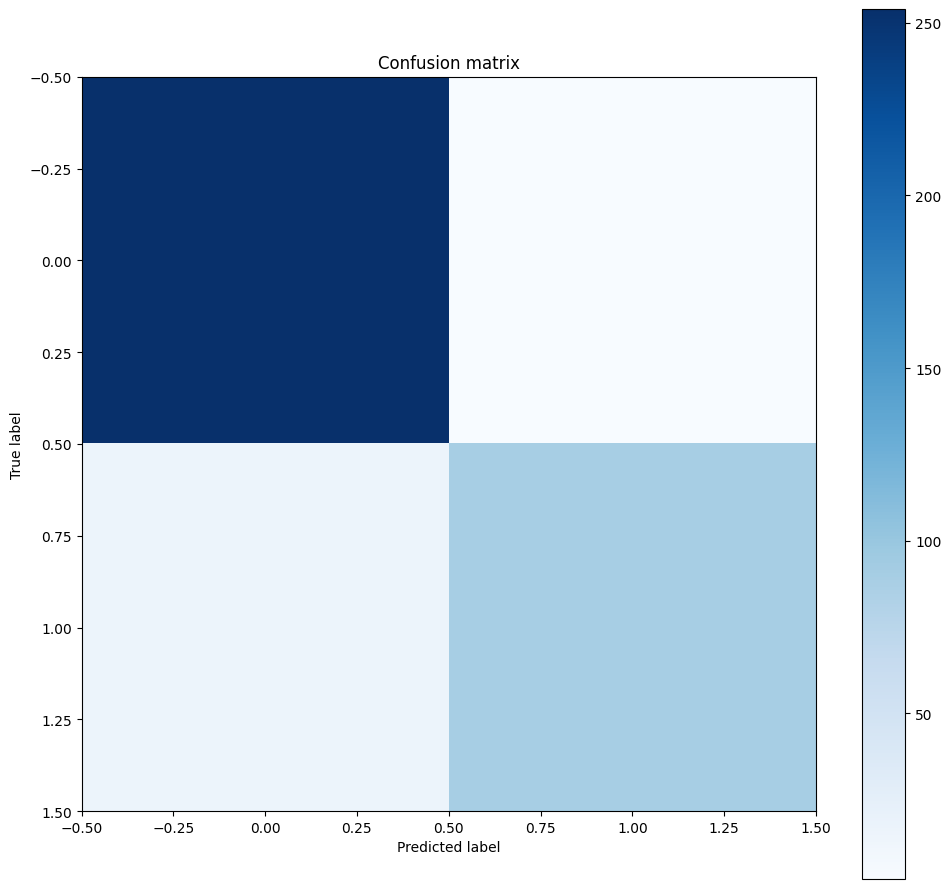

In [52]:
cm = confusion_matrix(y_valid, y_pred_rfc)
plot_confusion_matrix(cm)

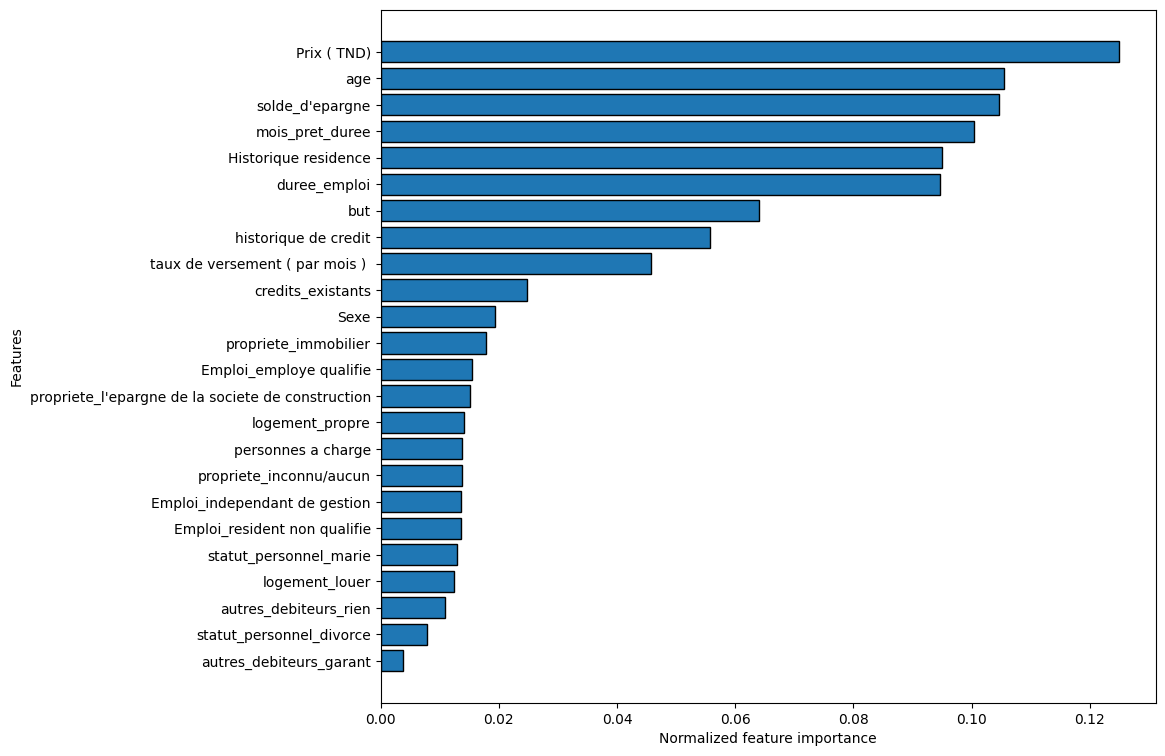

In [53]:
feature_importance_df = pd.DataFrame({'Feature':X.columns,'Importance':rfc.feature_importances_})
sorted_importance = plot_importance(feature_importance_df)

In [54]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier()
xg_reg.fit(X_train,y_train)
y_pred_xg = xg_reg.predict(X_valid)

print(classification_report(y_valid, y_pred_xg))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       256
           1       0.98      0.88      0.92       104

    accuracy                           0.96       360
   macro avg       0.96      0.93      0.95       360
weighted avg       0.96      0.96      0.96       360



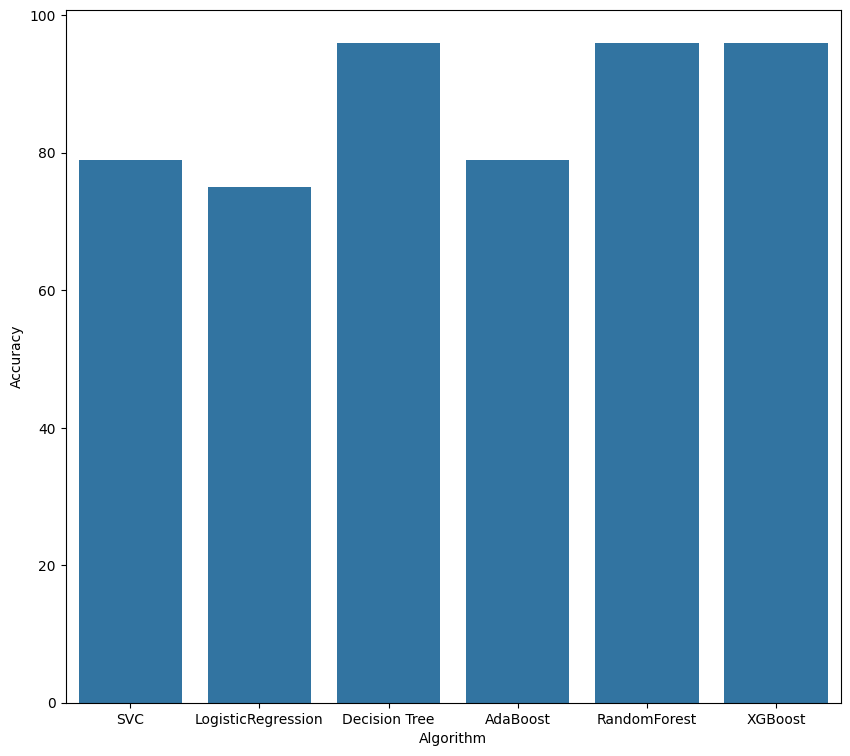

In [55]:
scores = [['SVC',79],['LogisticRegression',75],['Decision Tree',96],['AdaBoost',79],['RandomForest',96],['XGBoost',96]]
comparison = pd.DataFrame(scores, columns = ['Algorithm', 'Accuracy'])
plt.figure(figsize = (10, 9))
sns.barplot(x=comparison['Algorithm'],y=comparison['Accuracy'])
plt.show()